## Data Preprocessing and Feature Engineering

### Loading the Dataset
We start by importing the necessary Python libraries: 
* `pandas` for data manipulation and 
* `numpy` for numerical operations. 

The dataset, stored as `SOCR-HeightWeight.csv`, is loaded into a DataFrame using `pd.read_csv()`. This ensures that we have access to the height and weight data needed for feature engineering.

### Generating New Features
To enhance the dataset, we introduce five new columns, each with different statistical properties:

#### 1. Normally Distributed Feature
We generate a new column, `Normal_Distribution`, with values sampled from a standard normal distribution (mean = 0, standard deviation = 1). This helps simulate data that follows a Gaussian distribution.

#### 2. Left-Skewed Feature
A left-skewed distribution is created using the negative of an exponential distribution. This transformation ensures that most values are concentrated on the higher end with a long tail towards the lower values.

#### 3. Right-Skewed Feature
A right-skewed distribution is generated using the exponential distribution. This results in a dataset where most values are small, but a few large values exist in the long tail.

#### 4. Sinusoidal Feature
To introduce cyclic behavior, a `Sinusoidal` column is created using the sine function over a linear space from 0 to 200π. This mimics periodic trends in data, often useful in time-series analysis.

#### 5. Linear Combination of Height and Weight
A new feature is computed as a linear combination of height and weight using arbitrary weights (0.5 for height and 0.3 for weight). This can serve as a synthetic composite measure.

In [47]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "SOCR-HeightWeight.csv"  # Ensure this matches your actual file name
df = pd.read_csv(file_path, index_col="Index")

In [48]:
df.head()

Height(Inches)  Weight(Pounds)
Index                                
1            65.78331        112.9925
2            71.51521        136.4873
3            69.39874        153.0269
4            68.21660        142.3354
5            67.78781        144.2971

In [49]:
# Add a normally distributed column
df["Normal_Distribution"] = np.random.normal(loc=0, scale=1, size=len(df))

# Add a left-skewed distribution (using exponential and inverting)
df["Left_Skewed"] = -np.random.exponential(scale=1, size=len(df))

# Add a right-skewed distribution (using exponential)
df["Right_Skewed"] = np.random.exponential(scale=1, size=len(df))

# Add a sinusoidal column based on an index
df["Sinusoidal"] = np.sin(np.linspace(0, 200 * np.pi, len(df)))

labels = [-3, -2, -1, 0, 1, 2]
# Note: pd.qcut may raise an error if there are duplicate values causing empty bins.
df["Integer_Height"] = pd.qcut(df["Height(Inches)"], q=6, labels=labels).astype(int)

# 2. Add a binary column related with sinusoidal.
# For example, we assign 1 if the sinusoidal value is greater than 0, else 0.
df["Binary_Sinusoidal"] = (df["Sinusoidal"] > 0).astype(int)

# Add a linear combination of Height and Weight (assuming these columns exist)
df["Linear_Combination"] = 0.5 * df["Height(Inches)"] + 0.3 * df["Weight(Pounds)"]

In [50]:
df.head()

Height(Inches)  Weight(Pounds)  Normal_Distribution  Left_Skewed  \
Index                                                                     
1            65.78331        112.9925             0.336684    -0.067404   
2            71.51521        136.4873             1.953082    -2.027856   
3            69.39874        153.0269             1.359760    -0.330848   
4            68.21660        142.3354             1.131730    -4.390505   
5            67.78781        144.2971             0.539417    -0.088646   

       Right_Skewed  Sinusoidal  Integer_Height  Binary_Sinusoidal  \
Index                                                                
1          0.488769    0.000000              -3                  0   
2          0.517521    0.025131               2                  1   
3          0.546235    0.050246               1                  1   
4          1.070415    0.075330               0                  1   
5          3.738748    0.100366              -1                  1   

       Linear_Combination  
Index                      
1               66.789405  
2               76.703795  
3               80.607440  
4               76.808920  
5               77.183035

In [51]:
# Rename columns
df.rename(columns={"Height(Inches)": "Height", "Weight(Pounds)": "Weight"}, inplace=True)

# Create categorical bins for Height (5 categories)
height_bins = pd.qcut(df["Height"], q=5, labels=["Very Short", "Short", "Medium", "Tall", "Very Tall"])
df["Height_Category"] = height_bins

# Create categorical bins for Weight (5 categories)
weight_bins = pd.qcut(df["Weight"], q=5, labels=["Very Light", "Light", "Medium", "Heavy", "Very Heavy"])
df["Weight_Category"] = weight_bins

In [52]:
df.head()

Height    Weight  Normal_Distribution  Left_Skewed  Right_Skewed  \
Index                                                                       
1      65.78331  112.9925             0.336684    -0.067404      0.488769   
2      71.51521  136.4873             1.953082    -2.027856      0.517521   
3      69.39874  153.0269             1.359760    -0.330848      0.546235   
4      68.21660  142.3354             1.131730    -4.390505      1.070415   
5      67.78781  144.2971             0.539417    -0.088646      3.738748   

       Sinusoidal  Integer_Height  Binary_Sinusoidal  Linear_Combination  \
Index                                                                      
1        0.000000              -3                  0           66.789405   
2        0.025131               2                  1           76.703795   
3        0.050246               1                  1           80.607440   
4        0.075330               0                  1           76.808920   
5        0.100366              -1                  1           77.183035   

      Height_Category Weight_Category  
Index                                  
1          Very Short      Very Light  
2           Very Tall           Heavy  
3                Tall      Very Heavy  
4              Medium      Very Heavy  
5              Medium      Very Heavy

In [53]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns and update the DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [54]:
df.head(5)

Height    Weight  Normal_Distribution  Left_Skewed  Right_Skewed  \
Index                                                                       
1     -1.162051 -1.208072             0.335796     0.923705     -0.519747   
2      1.852136  0.806805             1.956351    -1.017401     -0.491102   
3      0.739165  2.225214             1.361503     0.662860     -0.462493   
4      0.117523  1.308328             1.132886    -3.356736      0.059760   
5     -0.107961  1.476561             0.539051     0.902672      2.718282   

         Sinusoidal  Integer_Height  Binary_Sinusoidal  Linear_Combination  \
Index                                                                        
1     -1.045074e-17       -1.463793               -1.0           -1.312928   
2      3.554145e-02        1.463840                1.0            1.128815   
3      7.106046e-02        0.878313                1.0            2.090216   
4      1.065346e-01        0.292787                1.0            1.154706   
5      1.419414e-01       -0.292740                1.0            1.246844   

      Height_Category Weight_Category  
Index                                  
1          Very Short      Very Light  
2           Very Tall           Heavy  
3                Tall      Very Heavy  
4              Medium      Very Heavy  
5              Medium      Very Heavy

In [55]:
df.describe().T

count          mean      std       min       25%  \
Height               25000.0  7.122196e-15  1.00002 -4.056893 -0.677686   
Weight               25000.0 -8.293455e-16  1.00002 -4.207707 -0.666407   
Normal_Distribution  25000.0  2.209788e-17  1.00002 -4.387046 -0.673051   
Left_Skewed          25000.0  2.413003e-16  1.00002 -8.478905 -0.371391   
Right_Skewed         25000.0 -7.258194e-17  1.00002 -1.006705 -0.710388   
Sinusoidal           25000.0  6.821210e-18  1.00002 -1.414242 -0.999957   
Integer_Height       25000.0  7.418066e-17  1.00002 -1.463793 -0.878267   
Binary_Sinusoidal    25000.0  0.000000e+00  1.00002 -1.000000 -1.000000   
Linear_Combination   25000.0  9.548273e-16  1.00002 -4.372199 -0.666194   

                              50%       75%       max  
Height               1.360090e-03  0.673021  3.765005  
Weight               6.717356e-03  0.670067  3.760041  
Normal_Distribution -1.010305e-03  0.671494  3.664618  
Left_Skewed          3.103481e-01  0.707717  0.990441  
Right_Skewed        -3.025749e-01  0.398373  8.283700  
Sinusoidal           2.767667e-15  0.999957  1.414242  
Integer_Height       2.342107e-05  0.878313  1.463840  
Binary_Sinusoidal    0.000000e+00  1.000000  1.000000  
Linear_Combination   3.310911e-04  0.671391  3.987770

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Height               25000 non-null  float64 
 1   Weight               25000 non-null  float64 
 2   Normal_Distribution  25000 non-null  float64 
 3   Left_Skewed          25000 non-null  float64 
 4   Right_Skewed         25000 non-null  float64 
 5   Sinusoidal           25000 non-null  float64 
 6   Integer_Height       25000 non-null  float64 
 7   Binary_Sinusoidal    25000 non-null  float64 
 8   Linear_Combination   25000 non-null  float64 
 9   Height_Category      25000 non-null  category
 10  Weight_Category      25000 non-null  category
dtypes: category(2), float64(9)
memory usage: 2.0 MB


In [57]:
# trick to speed up the workflow when working with large datasets
# be aware of timeseries!
# df = df[:2000]

## Visualizing the Distributions
Once the new features have been generated, it is important to analyze their distributions to understand their statistical properties. To achieve this, we create histogram plots with Kernel Density Estimation (KDE) overlays for each feature. 

#### Purpose of Visualization
- **Identify Distribution Shapes**: We can visually confirm whether our generated features exhibit the expected normal, skewed, or sinusoidal behaviors.
- **Detect Anomalies**: Unintended outliers or unusual patterns in the distributions can be identified.
- **Compare Feature Distributions**: Seeing all features plotted side-by-side helps in understanding their relative scales and trends.

#### Visualization Approach
Each feature is plotted separately using subplots, ensuring clarity and ease of comparison. The KDE overlay provides a smooth estimate of the probability density function, which helps in assessing the spread and shape of the distributions.

#### Insights from the Plots
- The `Normal_Distribution` column should display a bell-shaped curve centered around zero.
- The `Left_Skewed` column should have a long left tail due to the negative exponential transformation.
- The `Right_Skewed` column should show the opposite effect with a long right tail.
- The `Sinusoidal` column should exhibit periodic oscillations, reflecting its cyclic nature.
- The `Linear_Combination` column should resemble a weighted sum of height and weight, showing a mixed distribution.

These visualizations provide a comprehensive overview of the newly created features, facilitating further analysis and potential use in modeling.

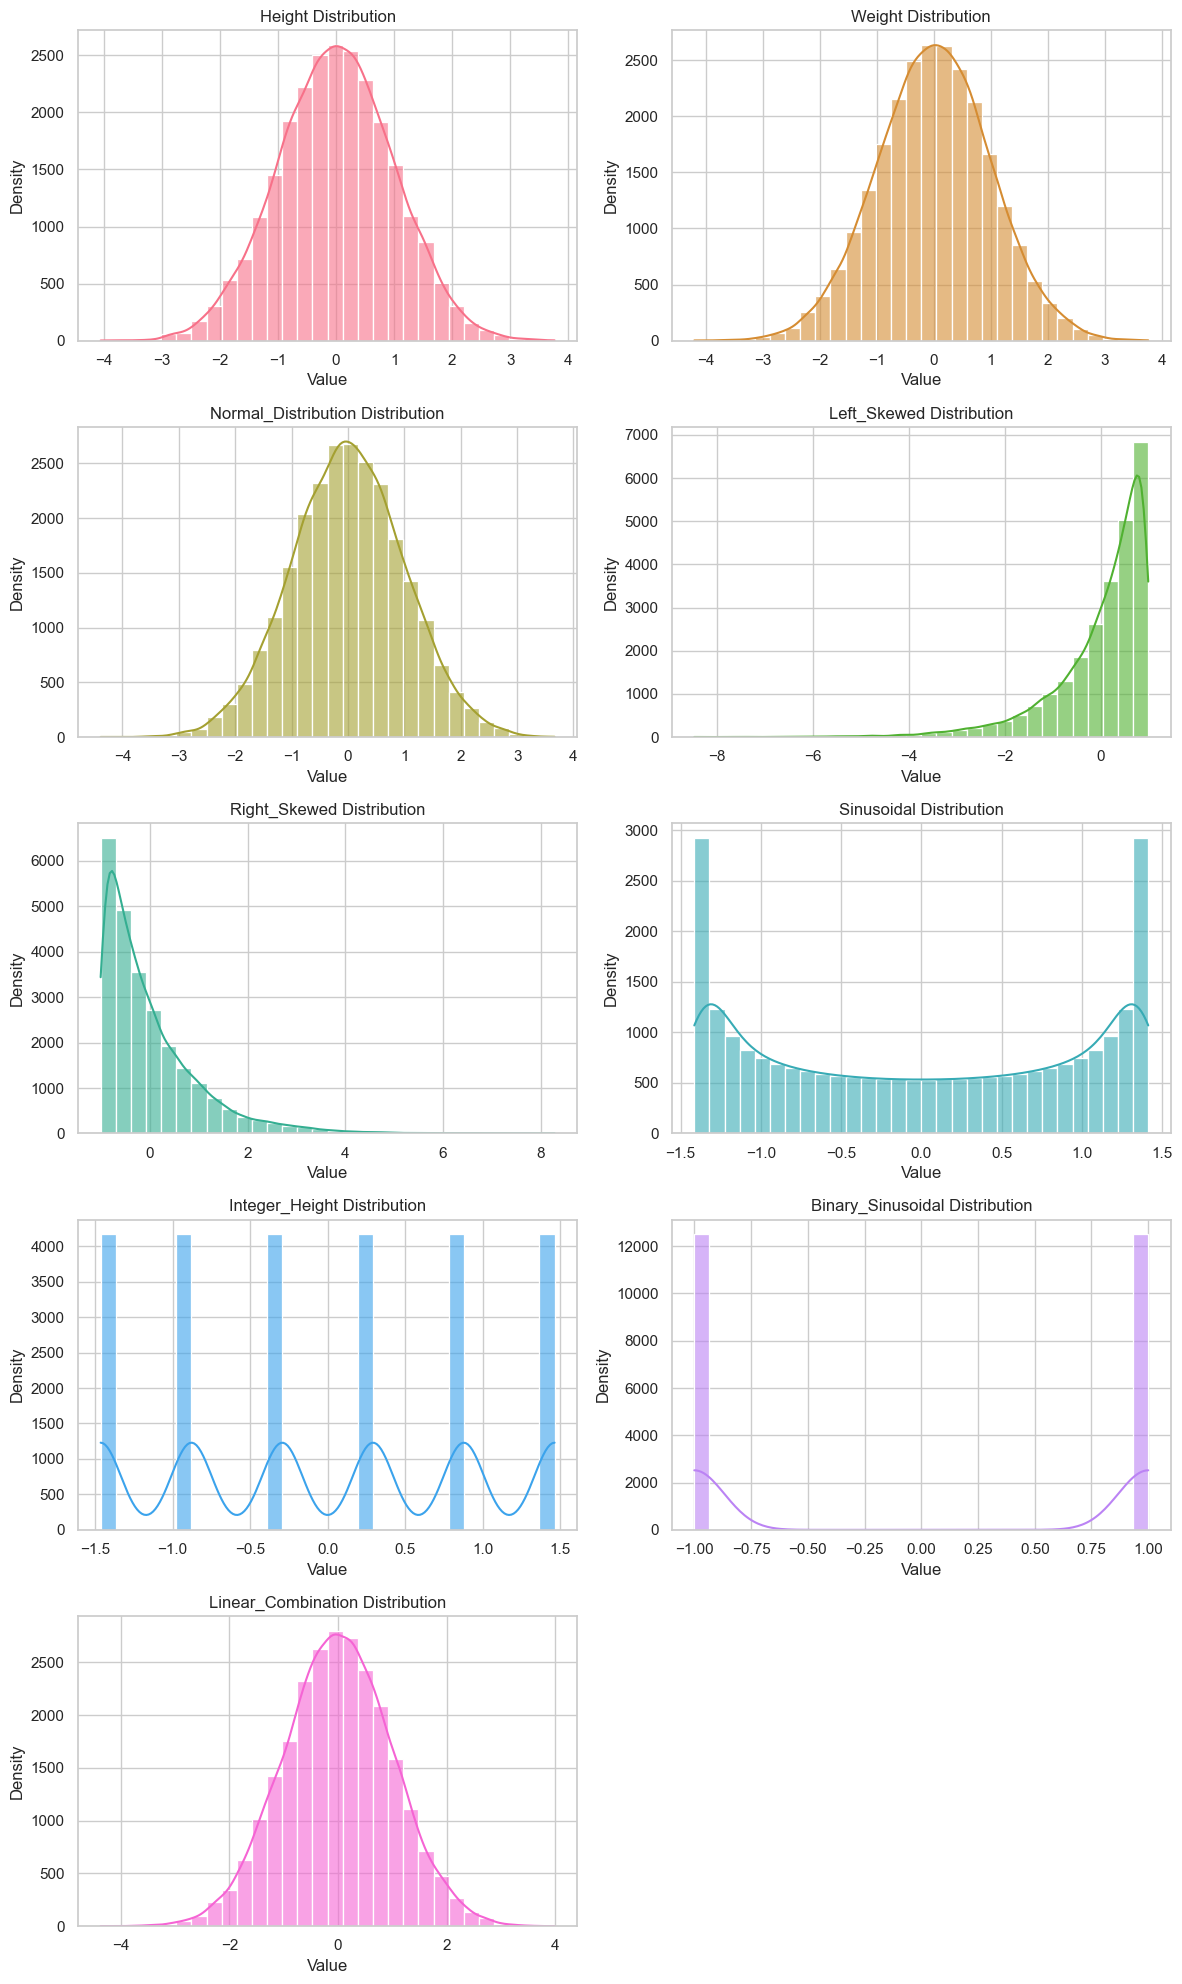

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style and random seed for reproducibility
# sns.set(style="whitegrid")
np.random.seed(42)

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Set up the figure and axes for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols // 2) + (num_cols % 2) # Calculate the number of rows needed if we place 2 plots per row
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4)) # Create a figure and a grid of subplots
axes = axes.flatten()

# Define colors for different distributions
colors = sns.color_palette("husl", num_cols)  # Use a distinct color palette, pastel, dark, deep, muted

# Plot histogram with KDE for each numerical column
for i, (col, color) in enumerate(zip(numerical_columns, colors)):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i], color=color, alpha=0.6)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")
    axes[i].grid(True)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Introducing Missing Values

For each column, we randomly remove 10% of the entries.

In [ ]:
# simple backup of original dataframe
df_bkp = df.copy()

for col in df.columns:
    # Use a fixed random_state for reproducibility per column
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Check the number of missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Height                 2500
Weight                 2500
Normal_Distribution    2500
Left_Skewed            2500
Right_Skewed           2500
Sinusoidal             2500
Integer_Height         2500
Binary_Sinusoidal      2500
Linear_Combination     2500
Height_Category        2500
Weight_Category        2500
dtype: int64
Height                 2500
Weight                 2500
Normal_Distribution    2500
Left_Skewed            2500
Right_Skewed           2500
Sinusoidal             2500
Integer_Height         2500
Binary_Sinusoidal      2500
Linear_Combination     2500
Height_Category        2500
Weight_Category        2500
dtype: int64


<Figure size 1000x600 with 0 Axes>

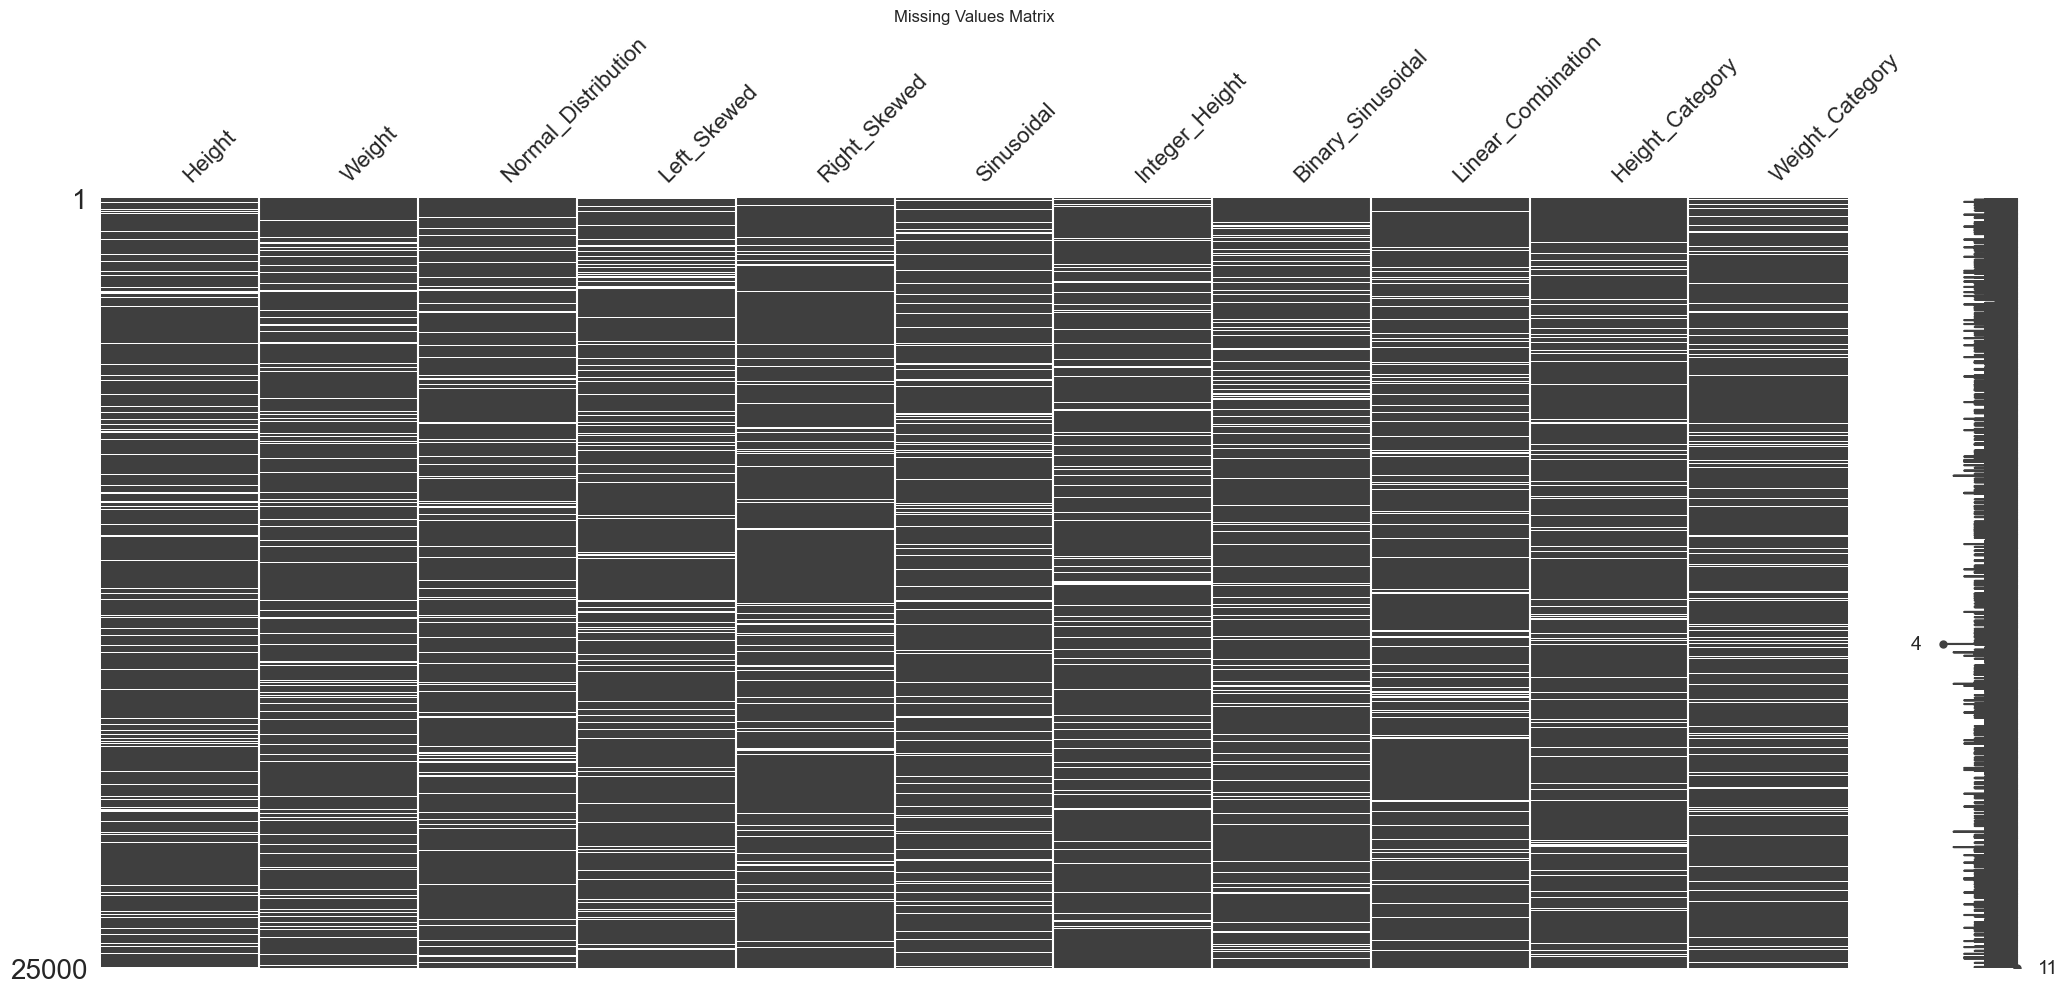

In [60]:
import missingno as msno

# Visualize missing data using missingno
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()


### Plot the distributions once more

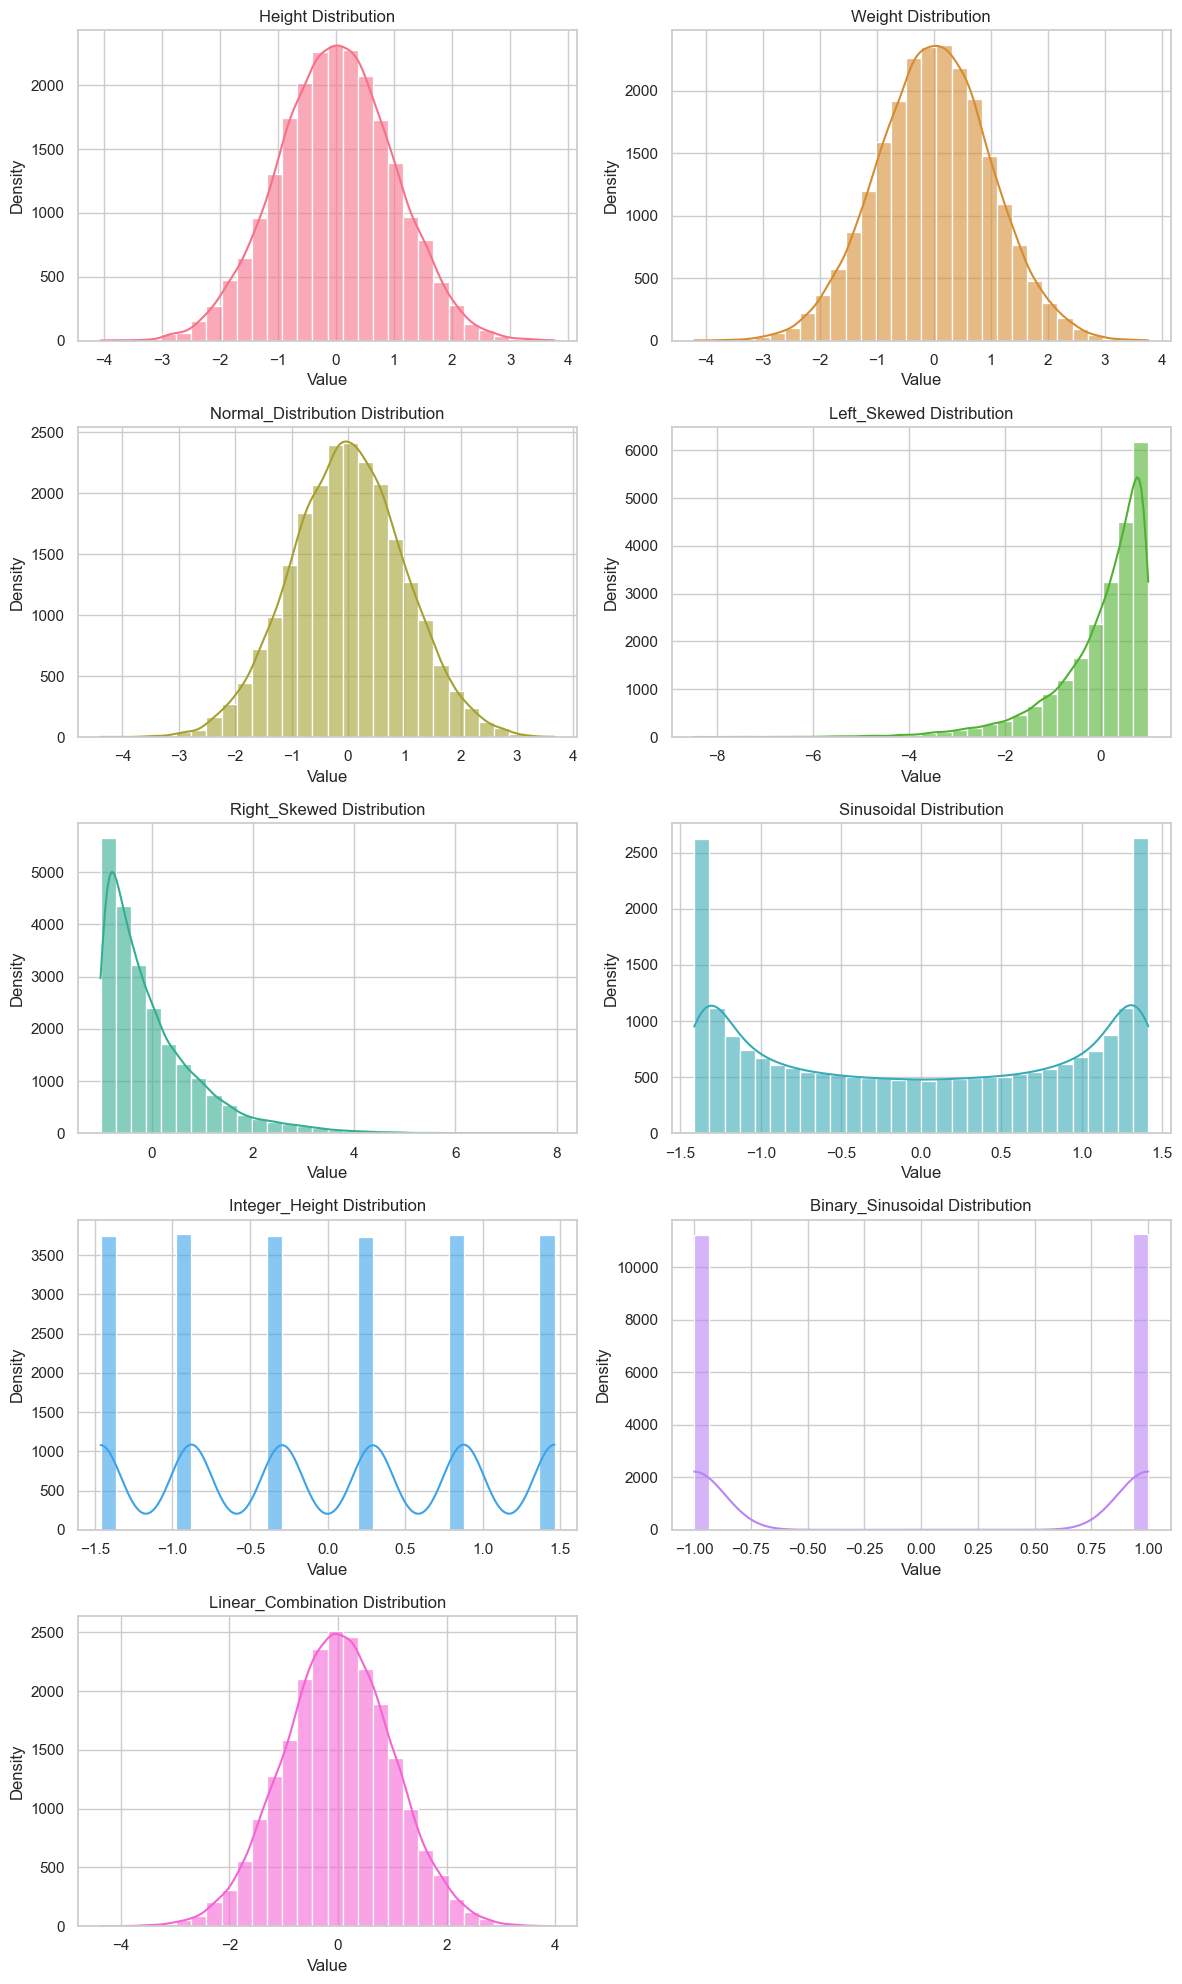

In [61]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Set up the figure and axes for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols // 2) + (num_cols % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.flatten()

# Define colors for different distributions
colors = sns.color_palette("husl", num_cols)  # Use a distinct color palette

# Plot histogram with KDE for each numerical column
for i, (col, color) in enumerate(zip(numerical_columns, colors)):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i], color=color, alpha=0.6)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")
    axes[i].grid(True)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The 3 types of missing data: 

1. MCAR (Missing Completely At Random)
2. MAR (Missing At Random, but depends on another variable)
3. MNAR (Missing Not At Random)

## Imputation Approaches on the Main DataFrame

We now apply various imputation techniques to fill in the missing values in our DataFrame.

**Methods applied:**

- **Mean Imputation:** Fills missing values with the column mean.
- **Median Imputation:** Fills missing values with the column median.
- **Mode Imputation:** Fills missing values with the most frequent value.
- **KNN Imputation:** Uses the k-nearest neighbors to impute missing values.
- **Iterative Imputation:** Models each feature with missing values as a function of other features.

In [ ]:
# Select only numerical columns
df_numerical = df.select_dtypes(include=['number'])
numerical_columns = df_numerical.columns.tolist()

#df[numerical_columns].head()

Height    Weight  Normal_Distribution  Left_Skewed  Right_Skewed  \
Index                                                                       
1     -1.162051 -1.208072             0.335796     0.923705     -0.519747   
2      1.852136  0.806805             1.956351    -1.017401     -0.491102   
3      0.739165  2.225214             1.361503     0.662860     -0.462493   
4      0.117523  1.308328             1.132886    -3.356736      0.059760   
5     -0.107961  1.476561             0.539051     0.902672      2.718282   

         Sinusoidal  Integer_Height  Binary_Sinusoidal  Linear_Combination  \
Index                                                                        
1     -1.045074e-17       -1.463793               -1.0           -1.312928   
2      3.554145e-02        1.463840                1.0            1.128815   
3      7.106046e-02        0.878313                1.0            2.090216   
4      1.065346e-01        0.292787                1.0            1.154706   
5      1.419414e-01       -0.292740                1.0            1.246844   

       Height_Category  Weight_Category  
Index                                    
1                    3                4  
2                    4                0  
3                    2                3  
4                    0                3  
5                    0                3

In [ ]:
# Import imputation methods from scikit-learn
from sklearn.impute import SimpleImputer

# Mean Imputation
imp_mean = SimpleImputer(strategy='mean')
df_mean = pd.DataFrame(imp_mean.fit_transform(df_numerical), columns=df_numerical.columns)

# Median Imputation
imp_median = SimpleImputer(strategy='median')
df_median = pd.DataFrame(imp_median.fit_transform(df_numerical), columns=df_numerical.columns)

# Mode (Most Frequent) Imputation
imp_mode = SimpleImputer(strategy='most_frequent')
df_mode = pd.DataFrame(imp_mode.fit_transform(df_numerical), columns=df_numerical.columns)


## Visual Comparison of Imputation Methods

For each column, we plot the histogram of the non-missing original data (blue) against the distribution after imputation (orange).

*Note:* Since the original data contains missing values, we drop them for the “original” histogram.

In [77]:
#sns.histplot(df_mode['Height'], kde=True, color='orange', label='Imputed', bins=30, alpha=0.6)


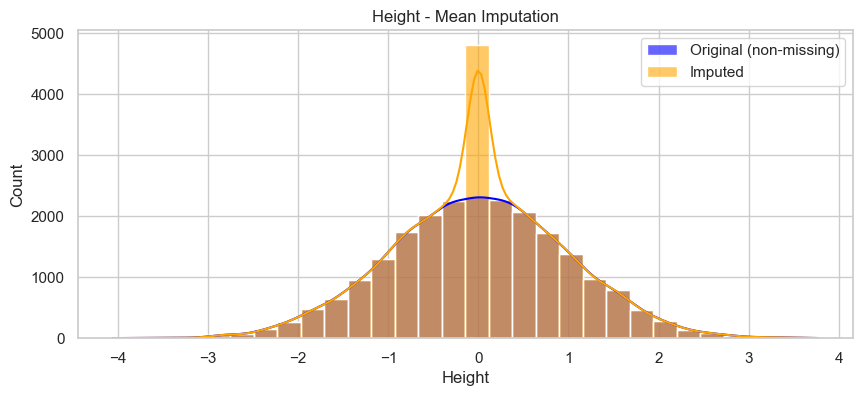

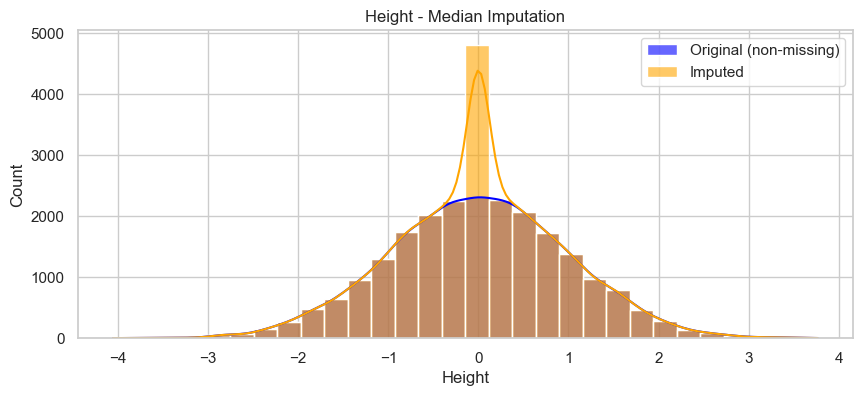

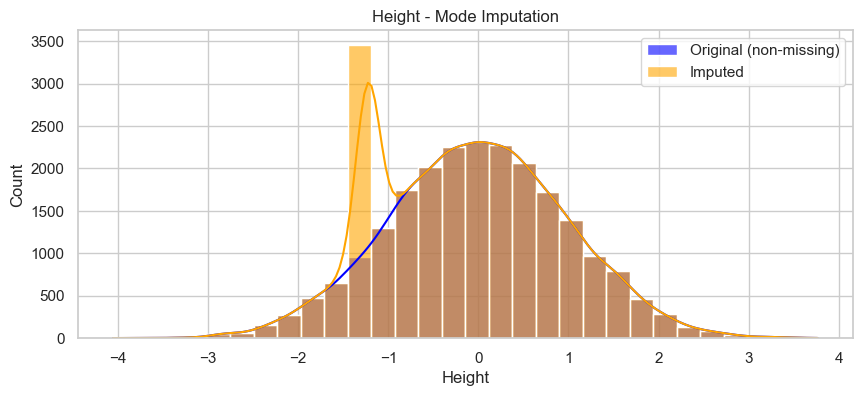

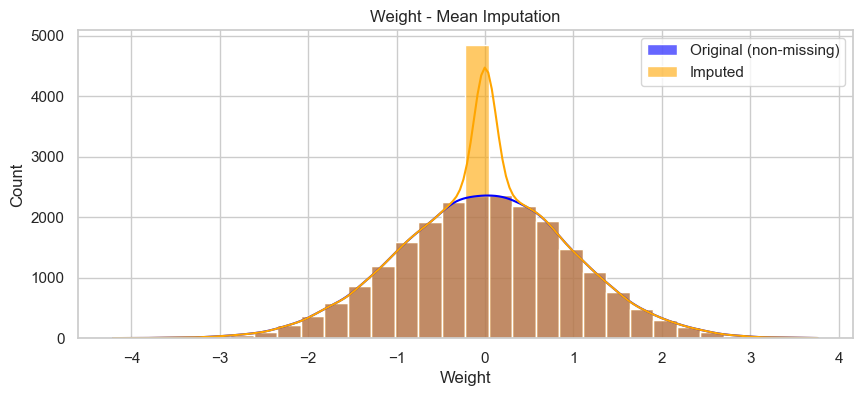

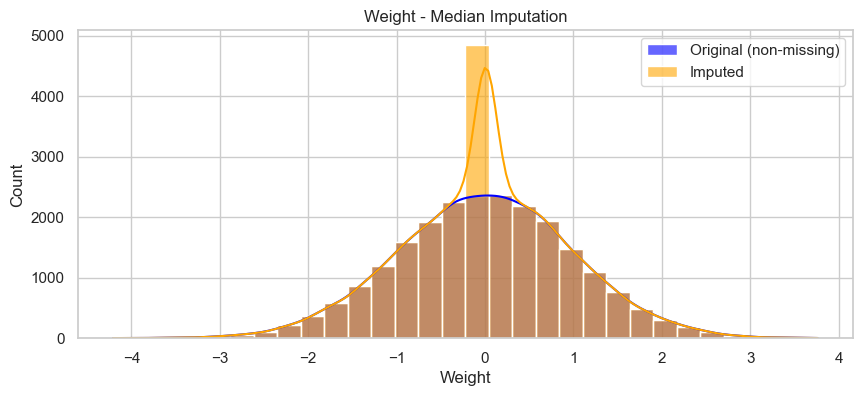

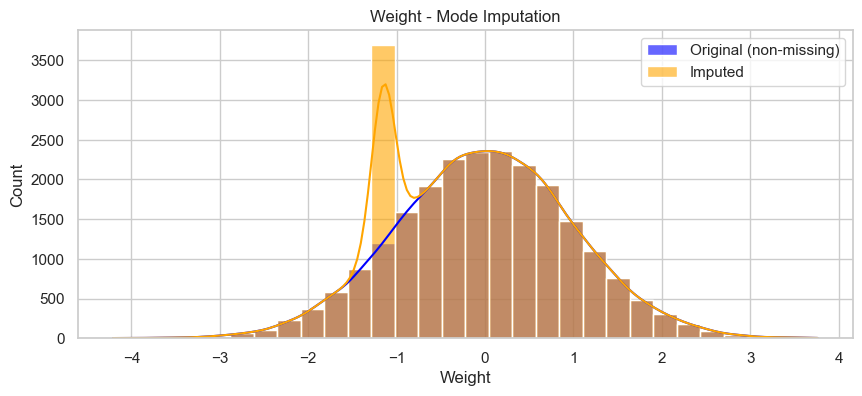

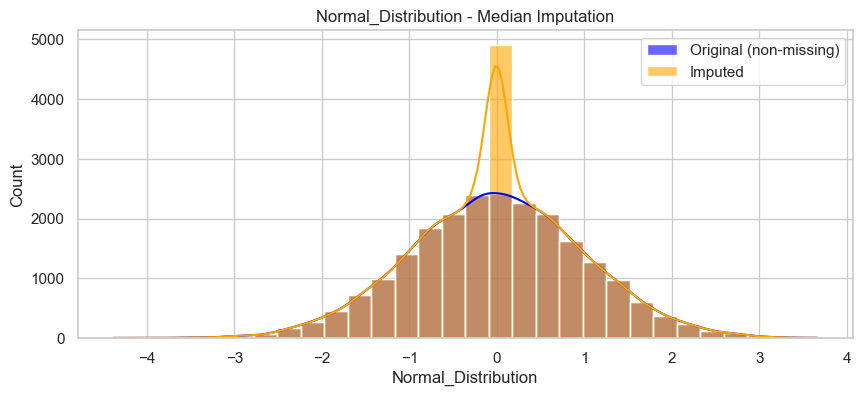

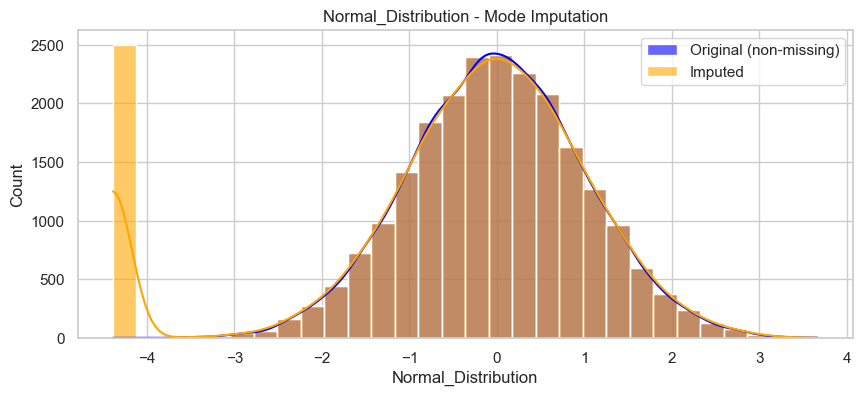

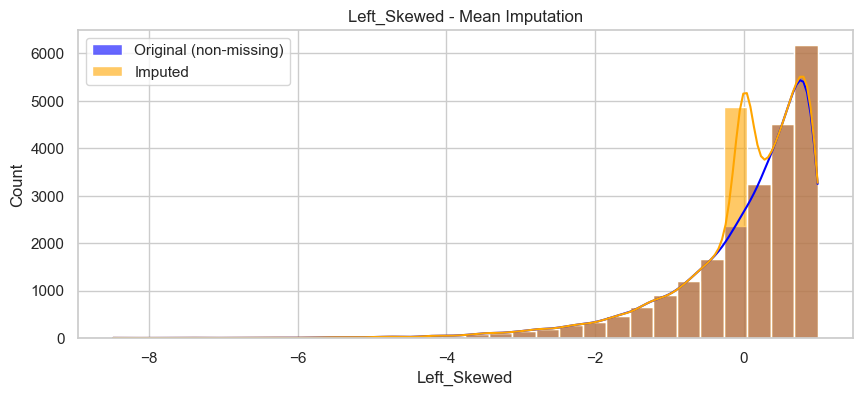

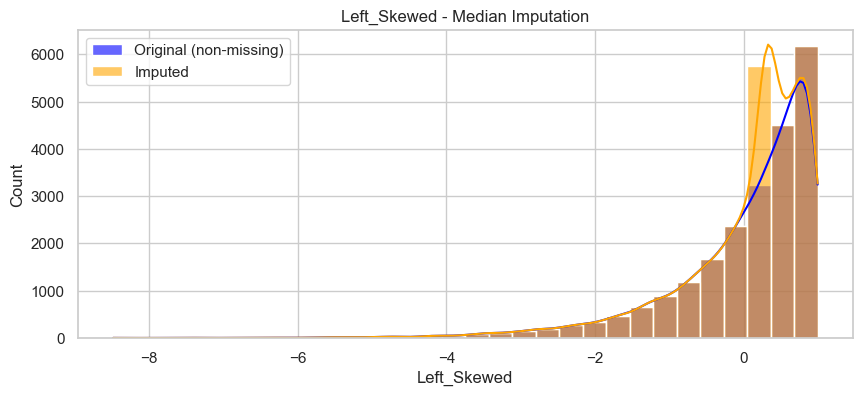

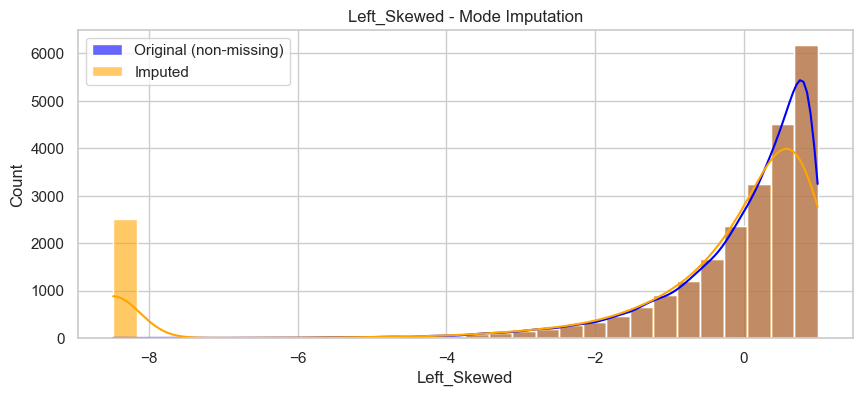

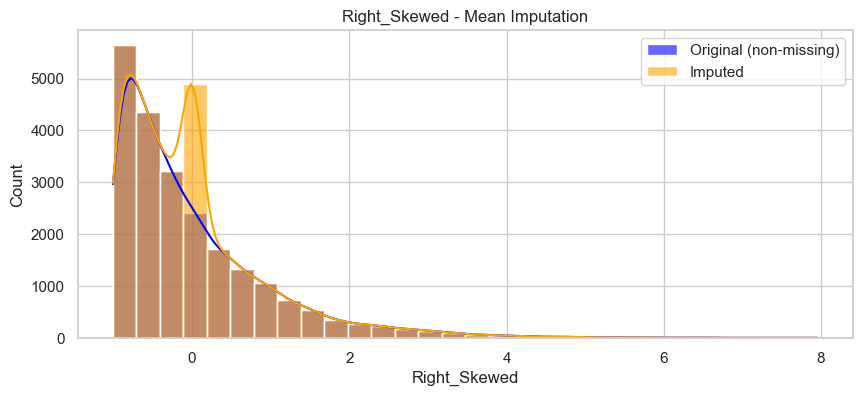

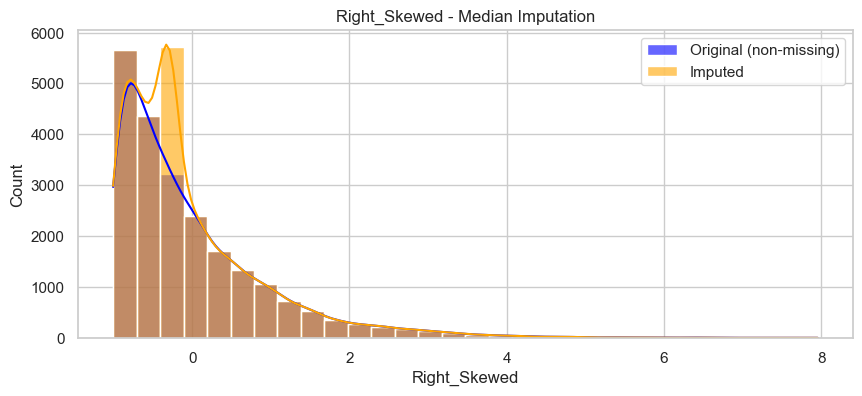

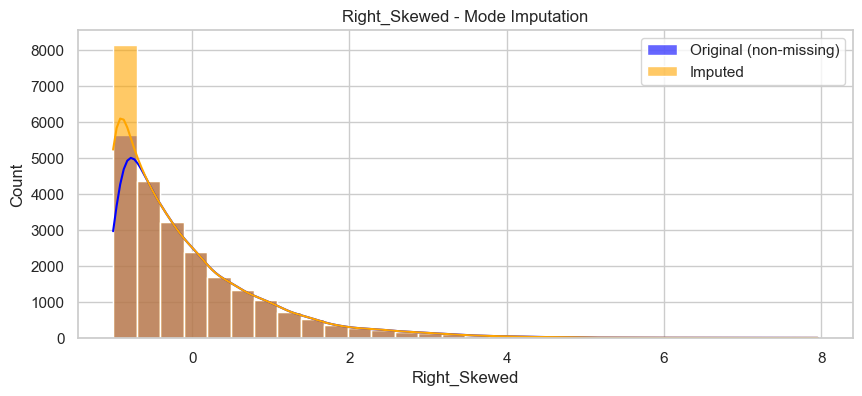

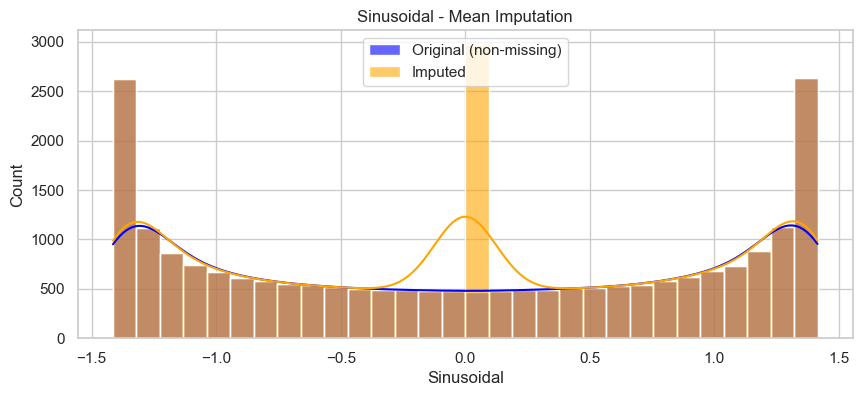

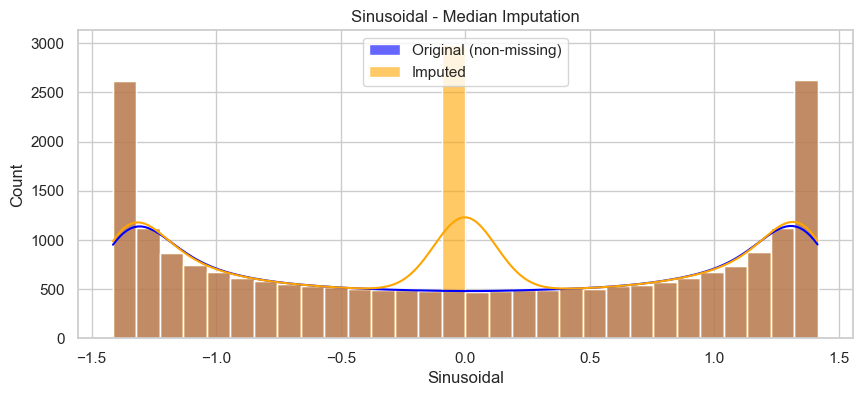

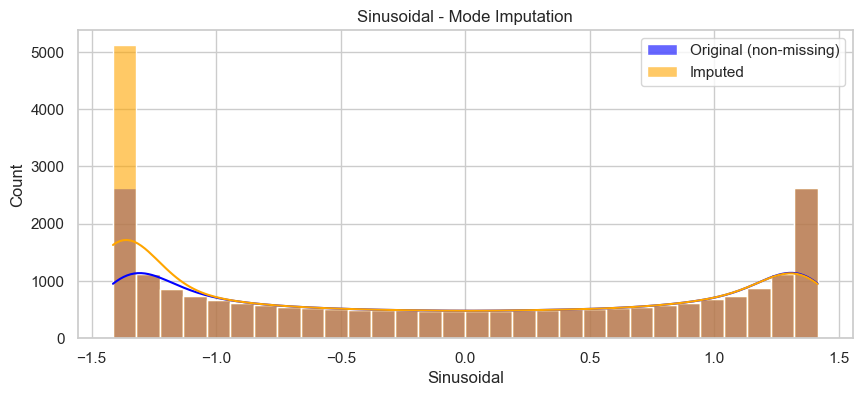

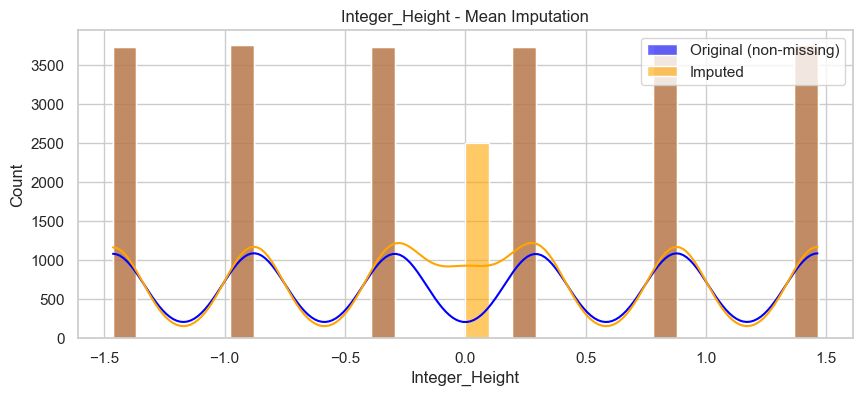

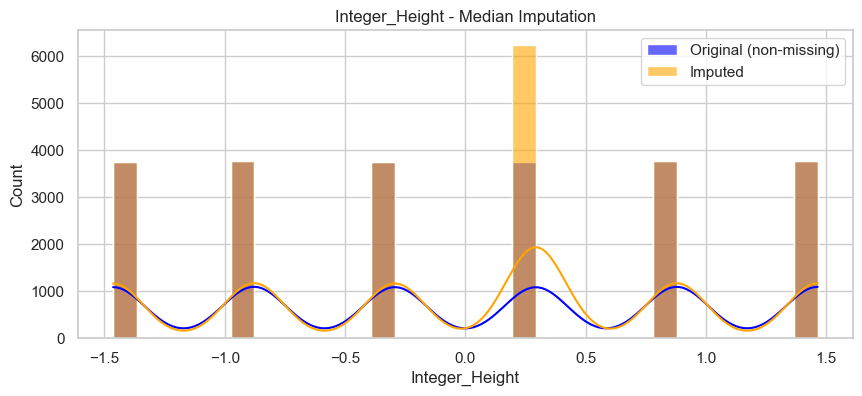

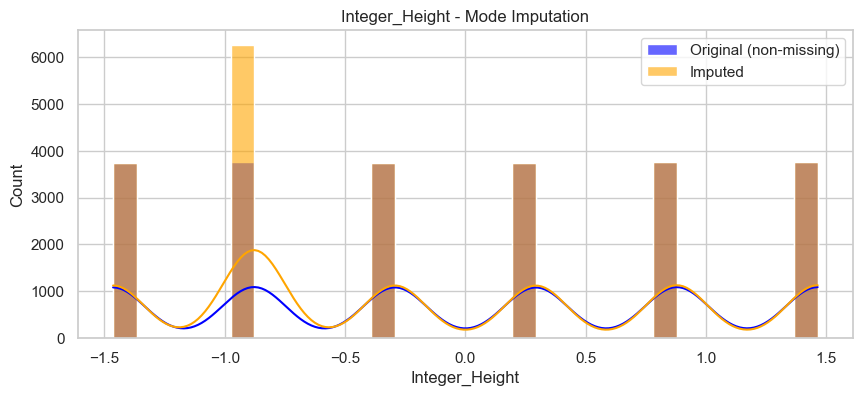

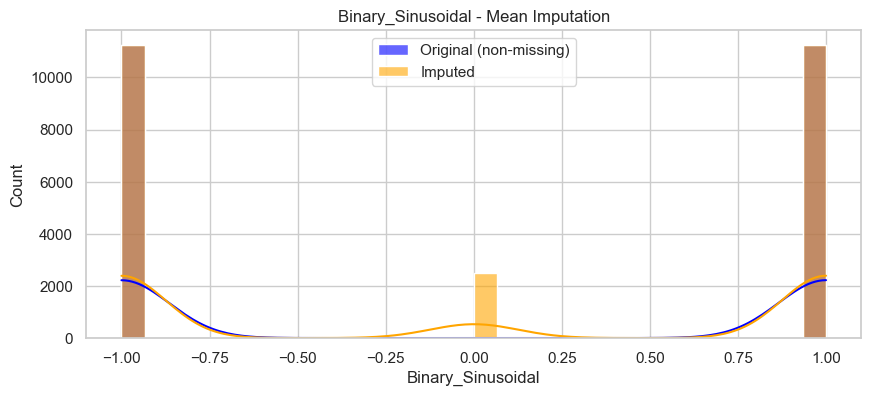

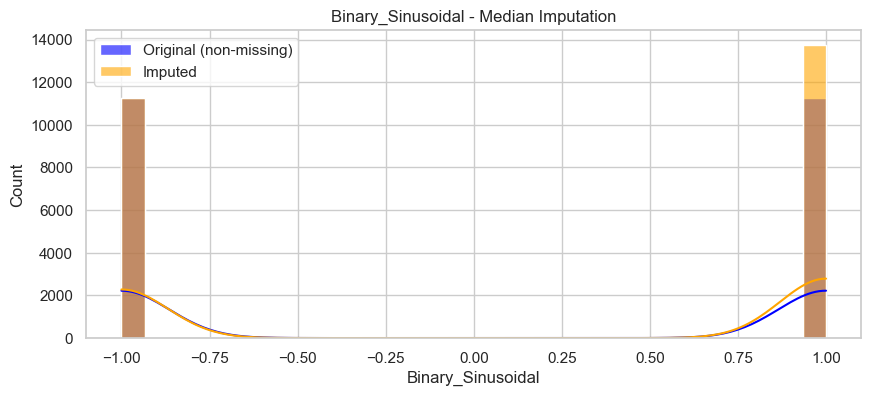

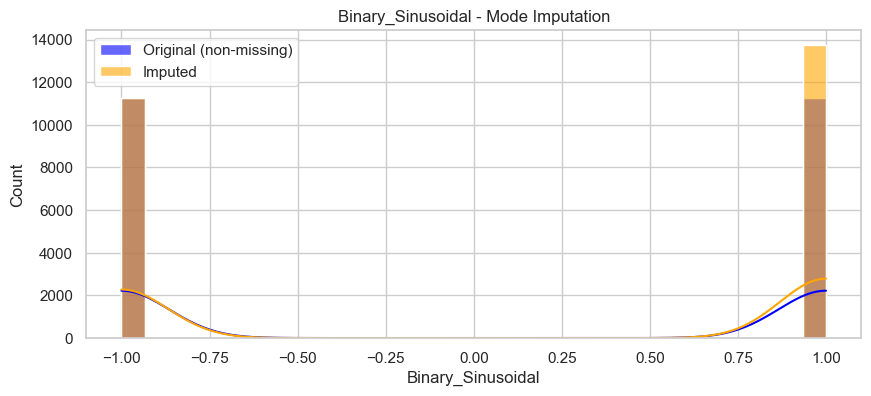

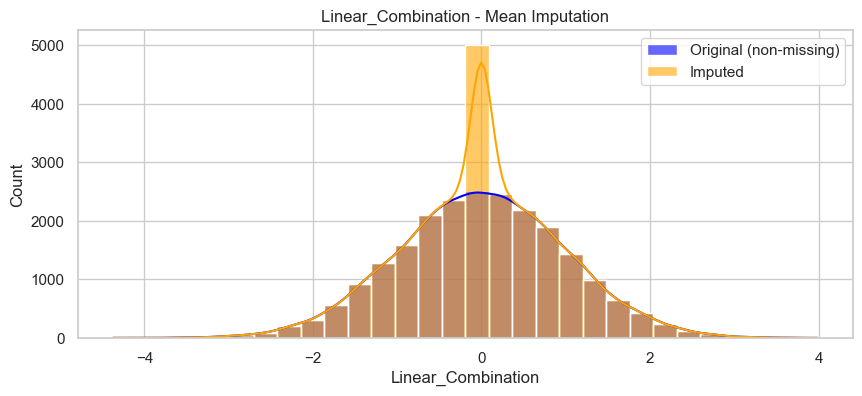

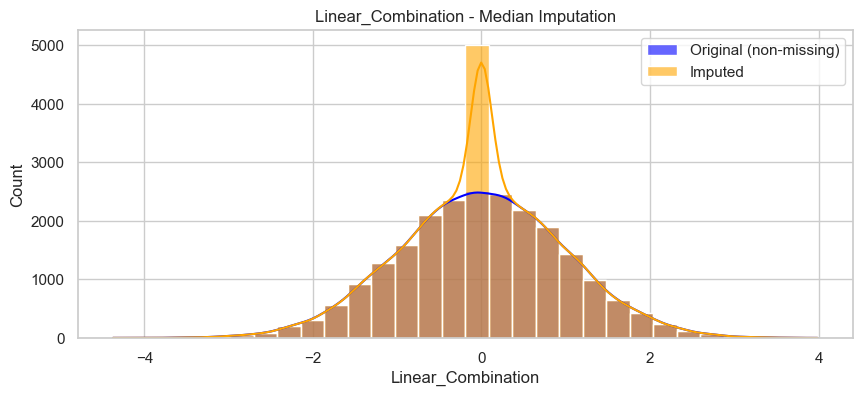

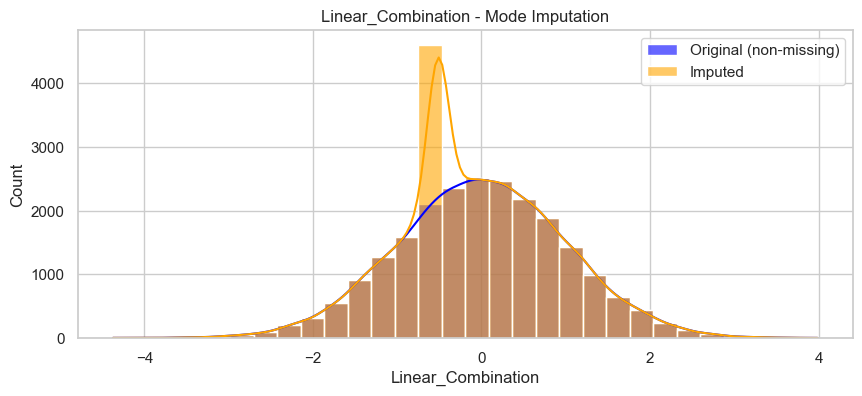

In [ ]:
def plot_imputation_comparison(original, imputed, title):
    plt.figure(figsize=(10, 4))
    # Plot the original data distribution (excluding NaNs) in blue
    sns.histplot(original.dropna(), kde=True, color='blue', label='Original (non-missing)', bins=30, alpha=0.6)
    # Plot the new data distribution (after imputation) in orange
    sns.histplot(imputed, kde=True, color='orange', label='Imputed', bins=30, alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()

# List of imputation results to compare
imputation_methods = {
    'Mean': df_mean,
    'Median': df_median,
    'Mode': df_mode
}

# For each column and each imputation method, plot the comparison
for col in df_numerical.columns:
    for method, df_imp in imputation_methods.items():
        plot_imputation_comparison(df_numerical[col], df_imp[col], f"{col} - {method} Imputation")

## **Iterative Imputation**
**Iterative Imputation** is a multivariate imputation technique that predicts missing values based on other features iteratively. It models each feature with missing values as a function of other features and predicts them iteratively.

### **How It Works**
1. Initialize missing values with basic statistics (e.g., mean, median).
2. Select one feature with missing values and treat it as the "target."
3. Use the remaining features as predictors to train a regression model.
4. Predict missing values for the target feature.
5. Move to the next feature with missing values and repeat the process.
6. Iterate multiple times until convergence or a set number of iterations is reached.

### **Pros & Cons**
**Pros:**
- Uses all available data for imputation.
- Works well with numerical features.
- Can use different estimators (e.g., `RandomForestRegressor`, `BayesianRidge`).

**Cons:**
- Computationally expensive.
- Requires careful tuning to prevent overfitting.
- Does not natively support categorical features.

---

## **K-Nearest Neighbors (KNN) Imputation**
KNN Imputation replaces missing values by finding the **K-nearest neighbors** of a data point and imputing the missing value based on their values.

### **How It Works**
1. Identify `k` nearest neighbors based on distance (e.g., Euclidean distance).
2. Compute the mean (or weighted mean) of the nearest neighbors for numerical features.
3. For categorical variables, the most frequent category among neighbors is used.

### **Pros & Cons**
✅ **Pros:**
- Does not assume any distribution of the data.
- Works well when missing values have a pattern similar to neighboring data points.
- Can handle categorical and numerical variables.

❌ **Cons:**
- Computationally expensive for large datasets.
- Sensitive to the choice of `k`.
- Requires scaling for best performance.

---

## **Choosing Between Iterative & KNN Imputation**
| **Criteria**           | **Iterative Imputation**                 | **KNN Imputation**            |
|------------------------|--------------------------------|-------------------------------|
| **Best for**          | Numerical data, complex relationships | Numerical and categorical data |
| **Computational Cost** | High (multiple iterations)    | Medium (distance calculations) |
| **Handles Categorical?** | No (requires encoding)       | Yes (mode imputation for categories) |
| **Hyperparameters**   | Estimator choice, iterations  | `k` value, distance metric |

**Summary:**
- Use **Iterative Imputation** when missing values depend on multiple features.
- Use **KNN Imputation** when data points have strong local similarities.


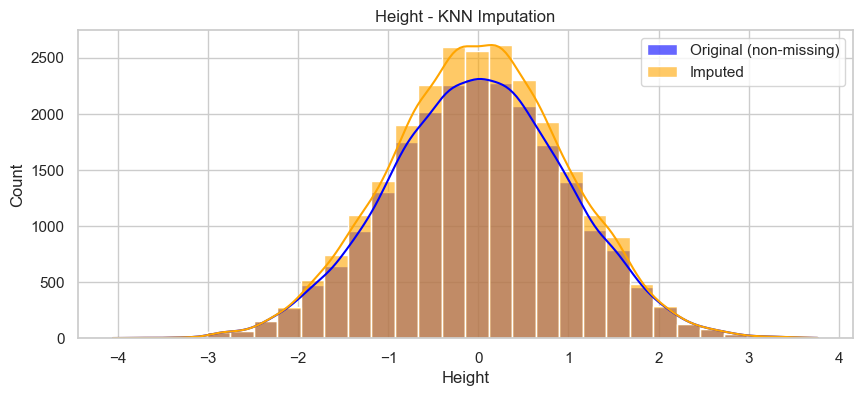

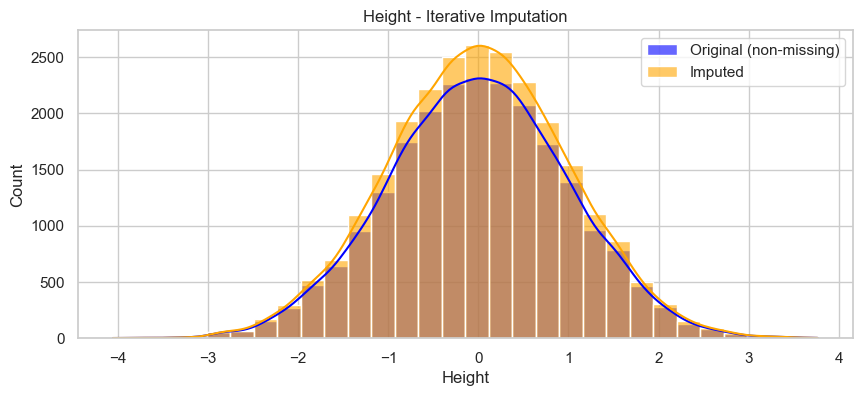

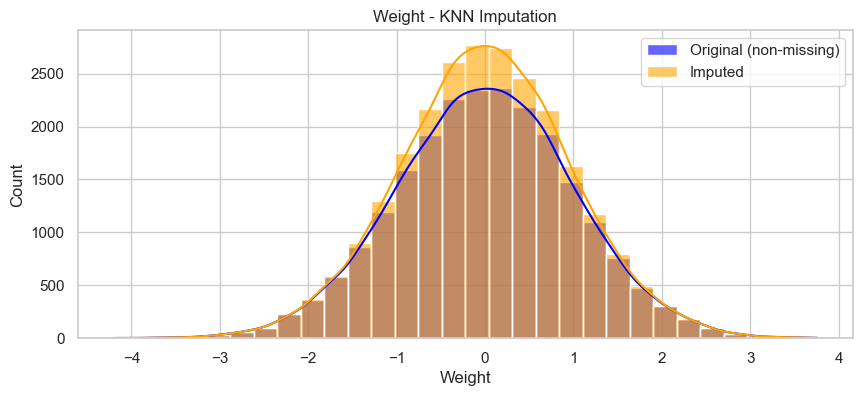

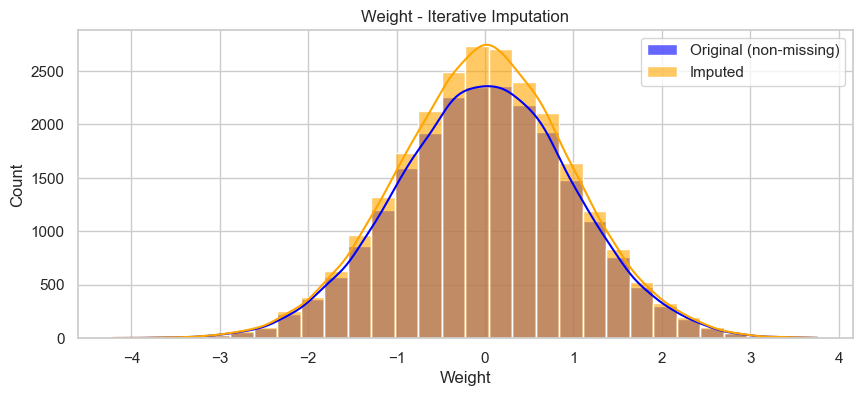

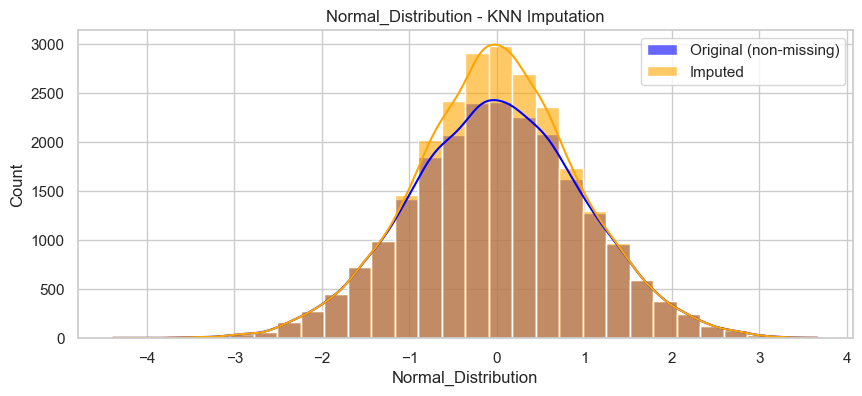

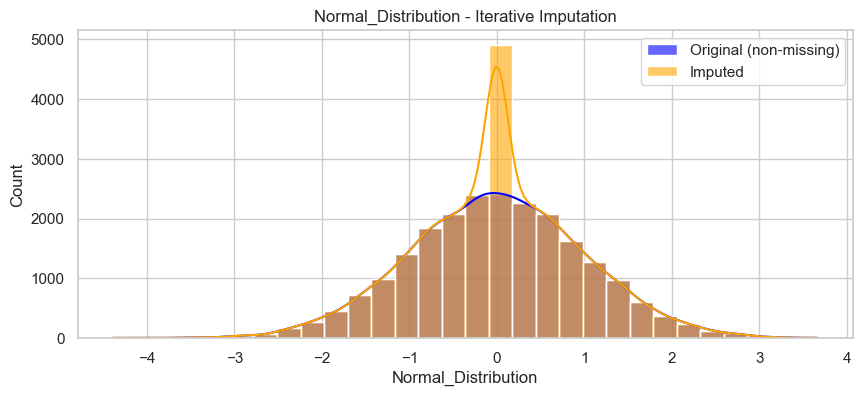

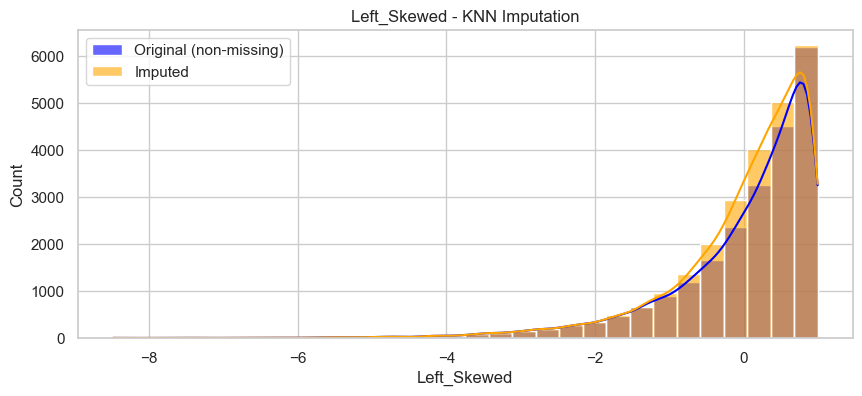

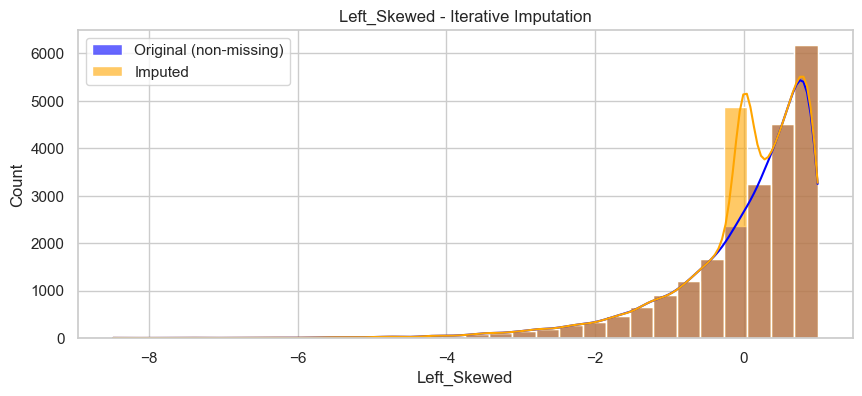

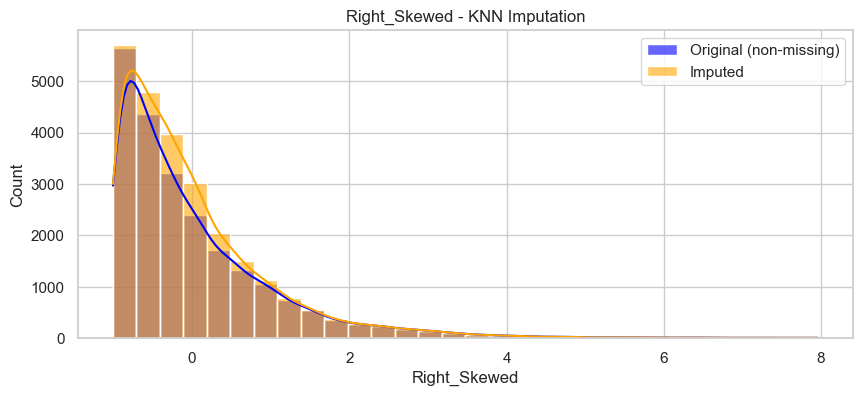

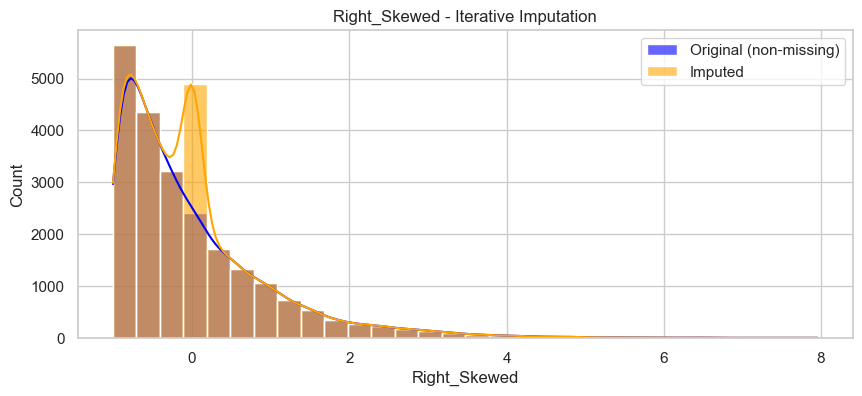

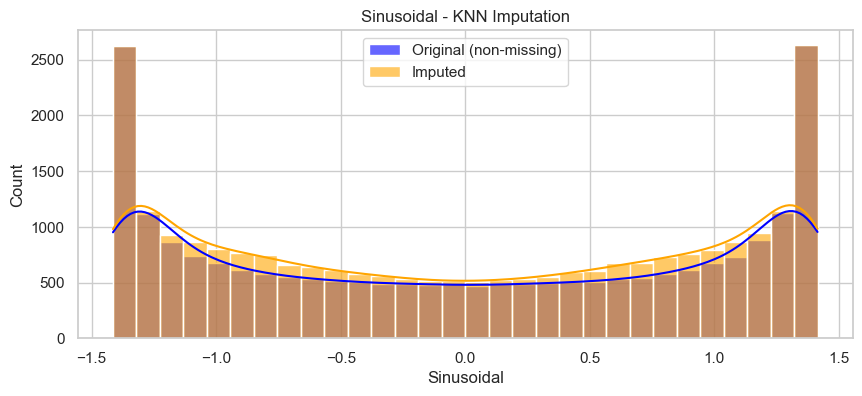

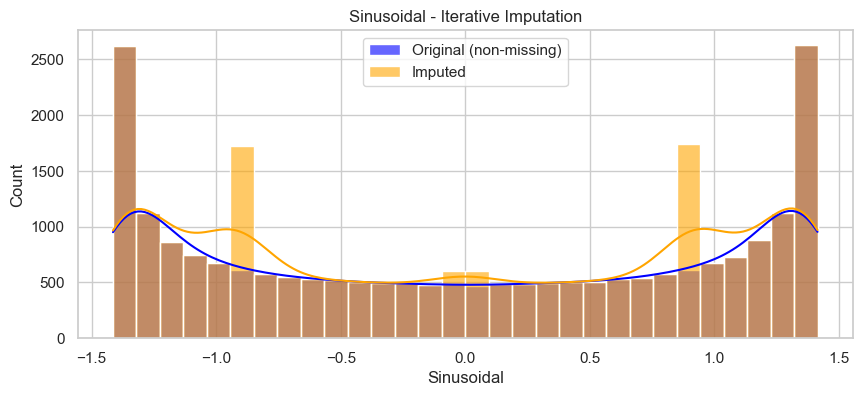

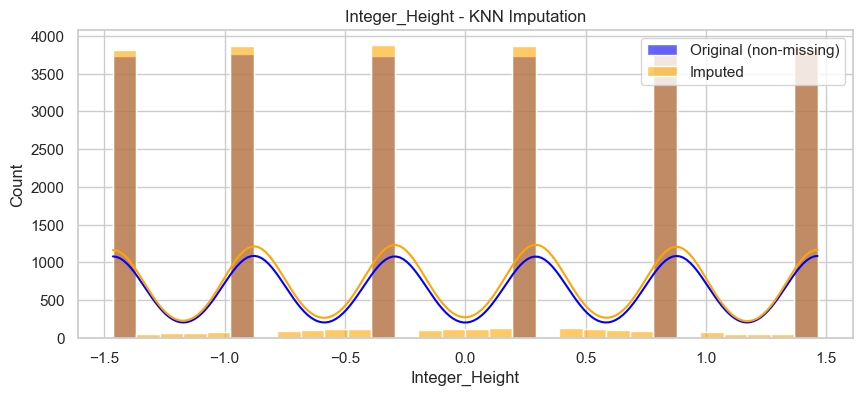

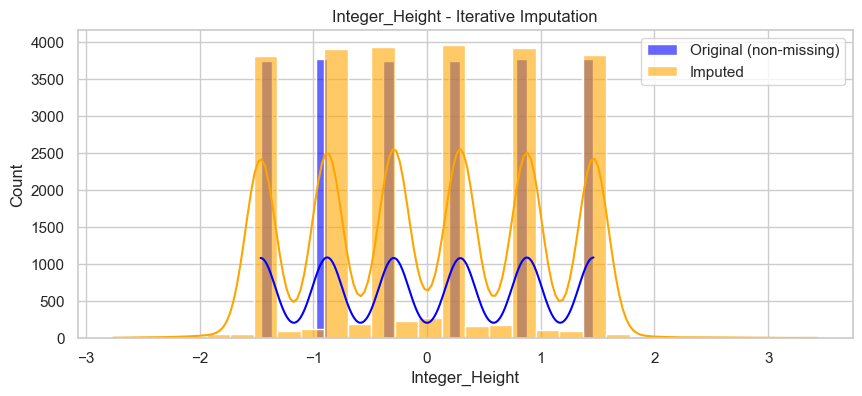

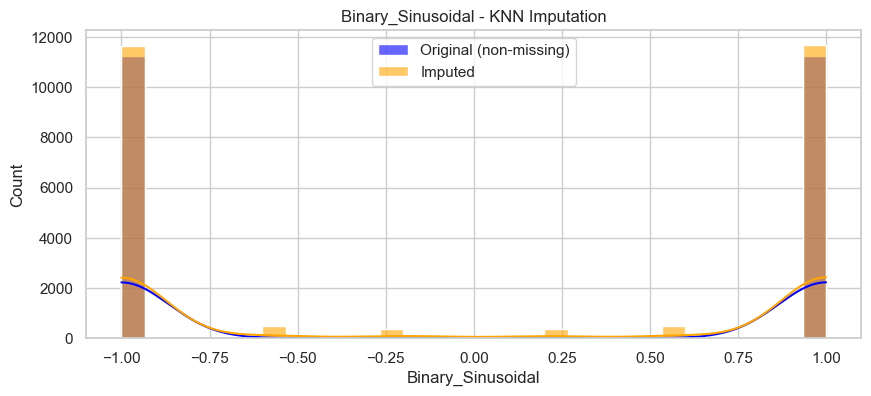

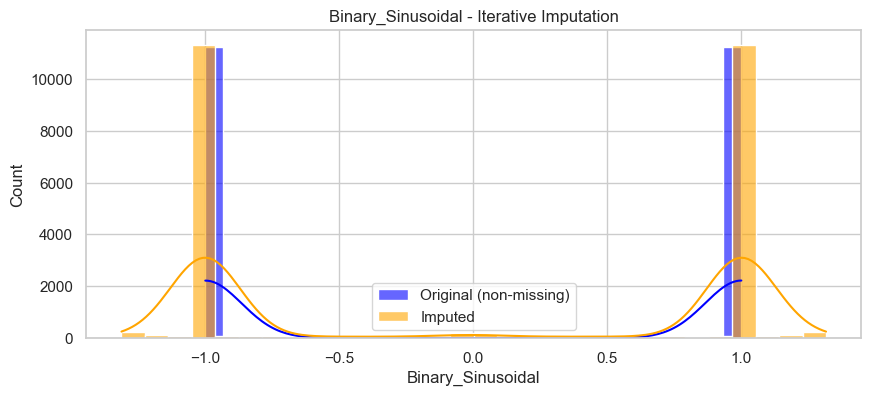

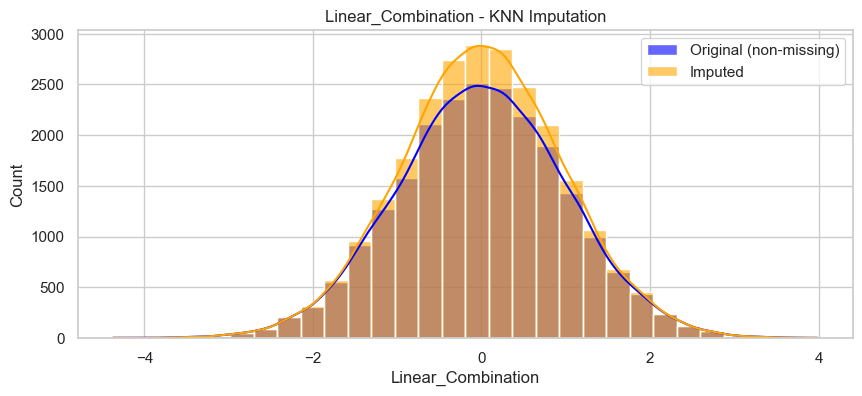

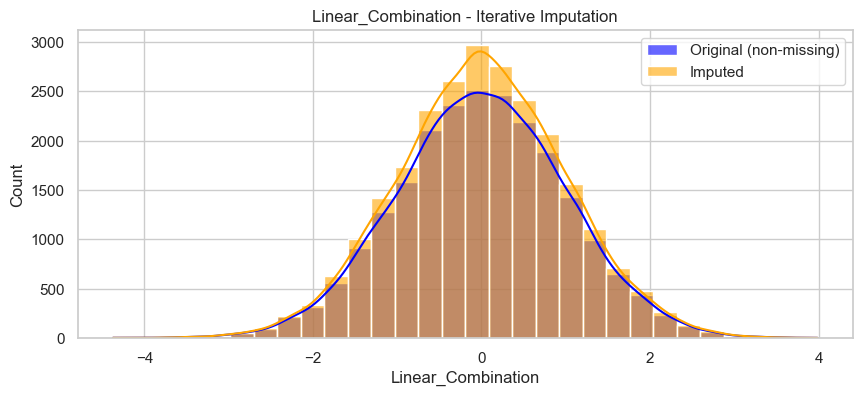

In [65]:
# Import imputation methods from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_numerical), columns=df_numerical.columns)

# Iterative Imputation
iter_imp = IterativeImputer(random_state=42)
df_iter = pd.DataFrame(iter_imp.fit_transform(df_numerical), columns=df_numerical.columns)

def plot_imputation_comparison(original, imputed, title):
    plt.figure(figsize=(10, 4))
    sns.histplot(original.dropna(), kde=True, color='blue', label='Original (non-missing)', bins=30, alpha=0.6)
    sns.histplot(imputed, kde=True, color='orange', label='Imputed', bins=30, alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()

# List of imputation results to compare
imputation_methods = {
    'KNN': df_knn,
    'Iterative': df_iter
}

# For each column and each imputation method, plot the comparison
for col in df_numerical.columns:
    for method, df_imp in imputation_methods.items():
        plot_imputation_comparison(df_numerical[col], df_imp[col], f"{col} - {method} Imputation")

## Check regression lines

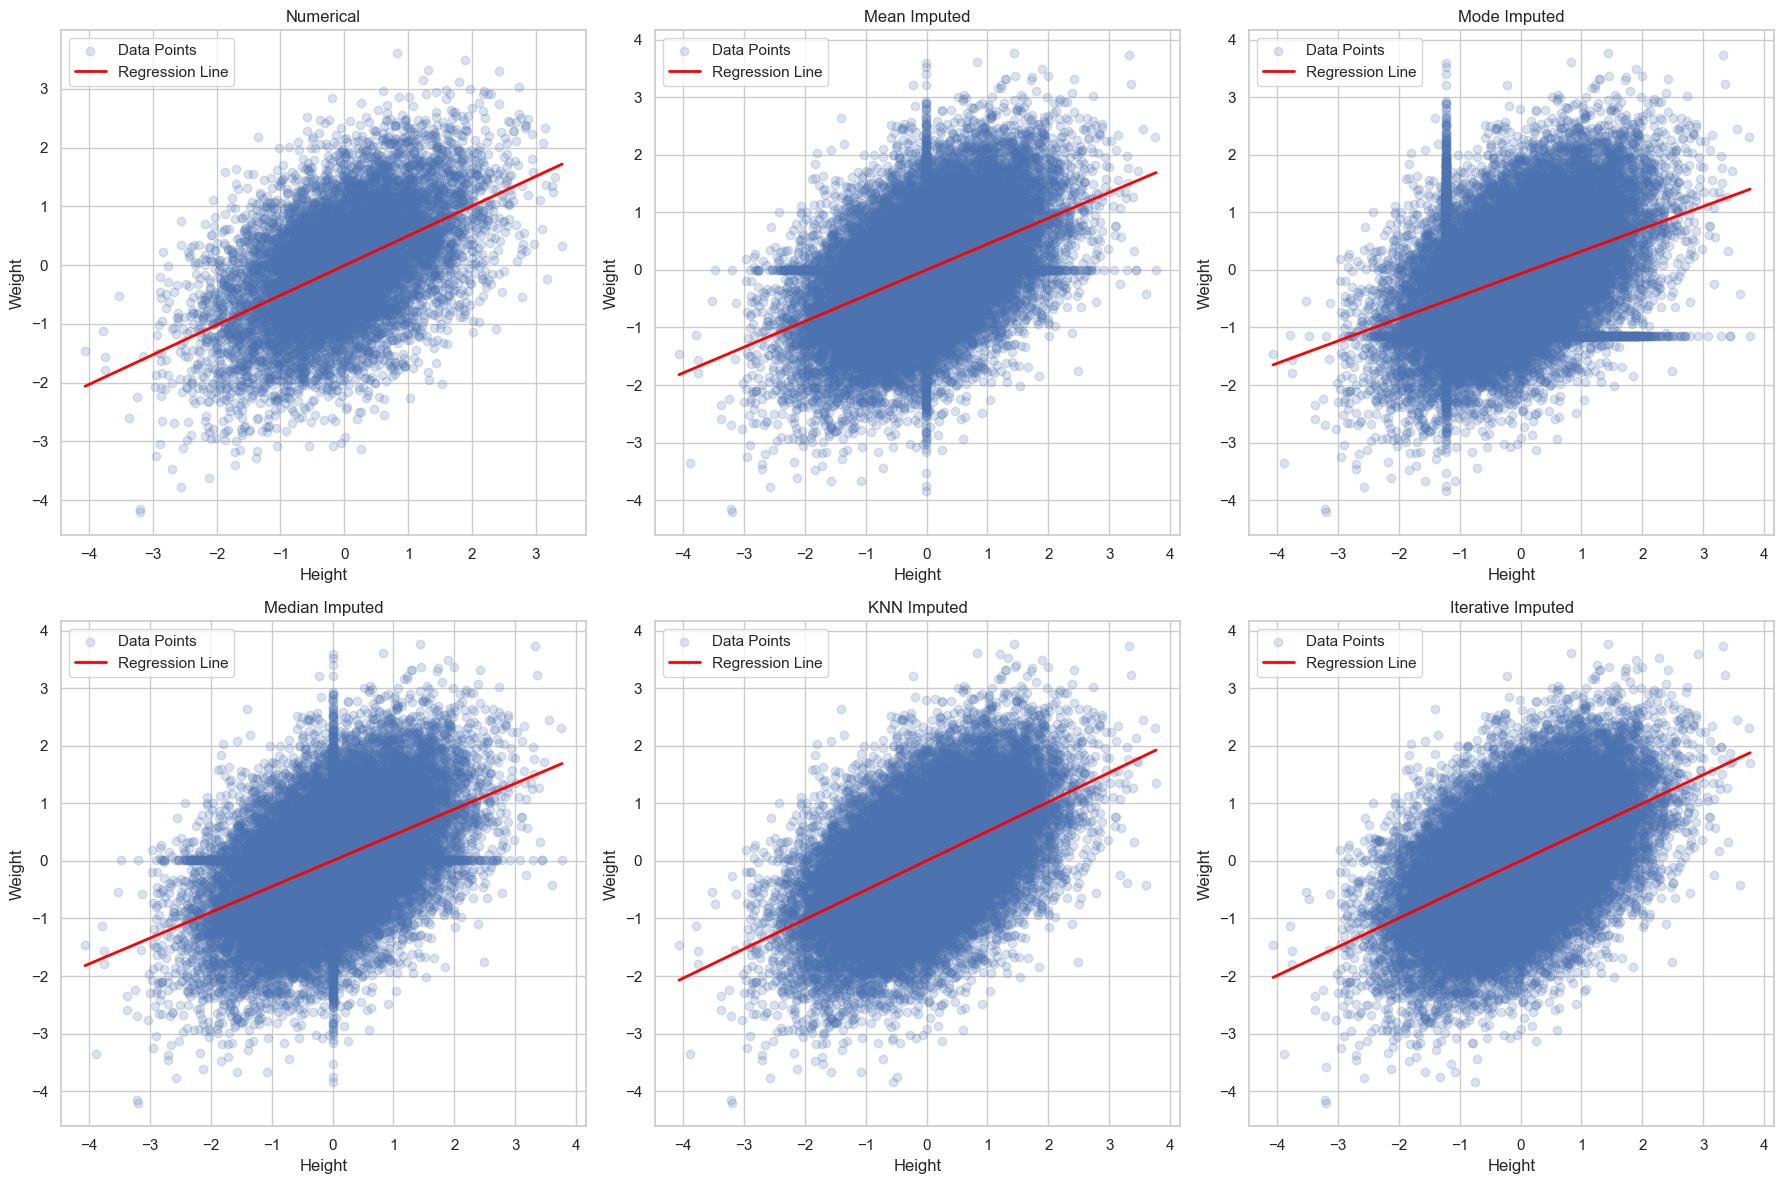

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Drop the NaN values from df_numerical (without using inplace)
df_numerical_clean = df_numerical.dropna()

# Define the DataFrames to analyze
dataframes = {
    "Numerical": df_numerical_clean,
    "Mean Imputed": df_mean,
    "Mode Imputed": df_mode,
    "Median Imputed": df_median,
    "KNN Imputed": df_knn,
    "Iterative Imputed": df_iter
}

# Create subplots (2 rows x 3 columns for 6 DataFrames)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop over each DataFrame and its corresponding axis
for ax, (method, df_imputed) in zip(axes.flatten(), dataframes.items()):
    # Extract the independent and dependent variables
    # Reshape X to be a 2D array as expected by scikit-learn.
    X = df_imputed["Height"].values.reshape(-1, 1)
    y = df_imputed["Weight"].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Create a range of values for X to predict the regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Plot the scatter of the original data
    ax.scatter(X, y, alpha=0.2, label="Data Points")
    # Plot the regression line
    ax.plot(x_range, y_pred, color="red", linewidth=2, label="Regression Line")

    # Set plot labels and title
    ax.set_title(method)
    ax.set_xlabel("Height")
    ax.set_ylabel("Weight")
    ax.legend()

plt.tight_layout()
plt.show()

## Let's check the correlation matrixes of these different imputation methods

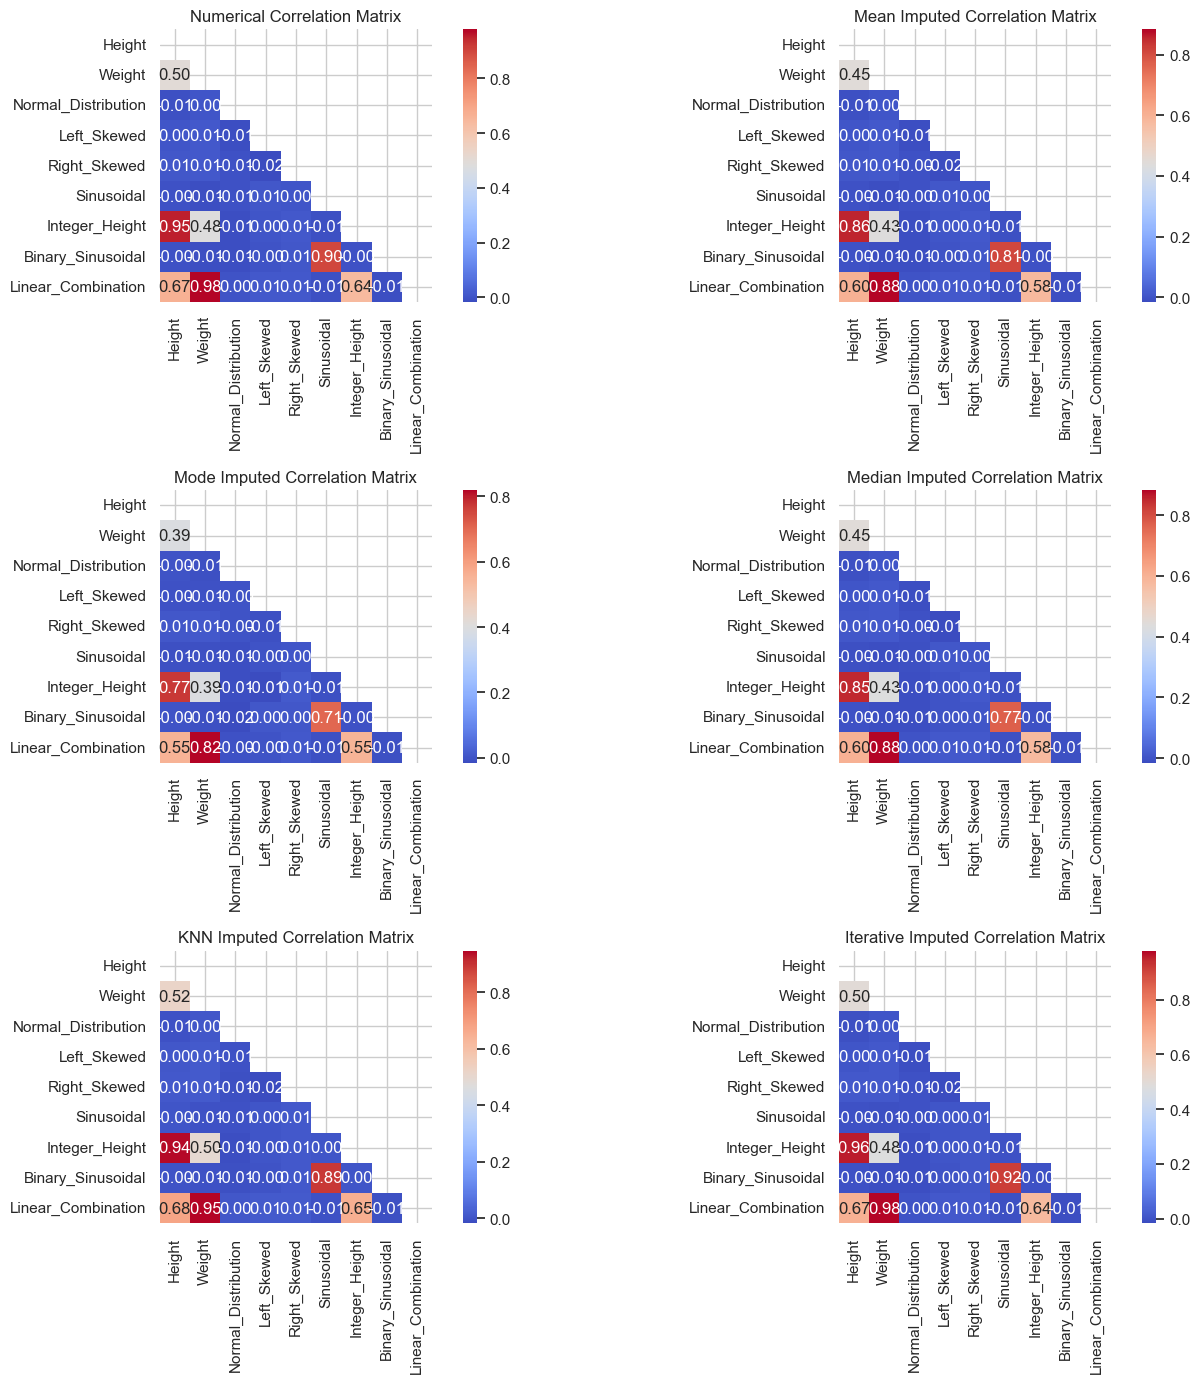

In [67]:
# Define the DataFrames to analyze
dataframes = {
    "Numerical": df_numerical,
    "Mean Imputed": df_mean,
    "Mode Imputed": df_mode,
    "Median Imputed": df_median,
    "KNN Imputed": df_knn,
    "Iterative Imputed": df_iter
}

# Plot correlation matrices for each DataFrame
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = axes.flatten()

for i, (title, df_corr) in enumerate(dataframes.items()):
    corr_matrix = df_corr.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
    
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[i], square=True)
    axes[i].set_title(f"{title} Correlation Matrix")

plt.tight_layout()
plt.show()

## How to deal with categoricals?

In [68]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# recreate the original dataframe
df = df_bkp.copy()

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["category"]).columns.tolist()

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Convert NaNs to string for encoding
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Decode categorical features back to original labels
for col in cat_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)  # Convert back to integer
    df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col])


In [69]:
df_imputed.sample(10)

Height    Weight  Normal_Distribution  Left_Skewed  Right_Skewed  \
15057 -0.651644 -1.544399             1.069042    -0.296472      0.799261   
17117 -1.577387 -2.705282            -1.346928     0.990157      1.564634   
1185  -1.872932 -1.903152            -1.328993     0.373548      0.721361   
3343   2.262444  1.017599            -0.332366    -0.192340      0.036685   
17646 -1.372259 -2.314141             1.385887     0.084512     -0.200303   
20233 -0.169766  0.738807             0.936302    -0.941861     -0.550633   
3992  -0.463607  0.311404            -0.015509     0.832288      0.483179   
23231  1.286140  0.912476            -0.152567     0.306852      0.036003   
18862  0.465969 -0.313046            -0.235265    -0.180962      0.400514   
22075 -1.673641 -0.972236            -0.106264    -0.994068     -0.115098   

       Sinusoidal  Integer_Height  Binary_Sinusoidal  Linear_Combination  \
15057    1.403541       -0.878267                1.0           -1.483167   
17117    0.258551       -1.463793                1.0           -2.700103   
1185    -1.411556       -1.463793               -1.0           -2.078239   
3343     1.015388        1.463840                1.0            1.406507   
17646   -0.733807       -1.463793               -1.0           -2.315082   
20233   -0.559726       -0.292740               -1.0            0.596762   
3992    -0.276874       -0.878267               -1.0            0.159726   
23231   -0.620447        1.463840               -1.0            1.087317   
18862    0.428412        0.878313                1.0           -0.160587   
22075    1.334995       -1.463793                1.0           -1.229544   

      Height_Category Weight_Category  
15057           Short      Very Light  
17117      Very Short      Very Light  
1185       Very Short      Very Light  
3343        Very Tall      Very Heavy  
17646      Very Short      Very Light  
20233          Medium           Heavy  
3992            Short           Heavy  
23231       Very Tall      Very Heavy  
18862            Tall           Light  
22075      Very Short      Very Light